In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import pandas as pd

In [2]:
scope = pd.read_csv("SCOPe.csv")
scope

,sid,sccs,description,pdb_id,superfamily,fold,class
0,d1ux8a_,a.1.1.1,1ux8 A:,1ux8,a.1.1,a.1,a
1,d1dlwa_,a.1.1.1,1dlw A:,1dlw,a.1.1,a.1,a
2,d1uvya_,a.1.1.1,1uvy A:,1uvy,a.1.1,a.1,a
3,d1dlya_,a.1.1.1,1dly A:,1dly,a.1.1,a.1,a
4,d1uvxa_,a.1.1.1,1uvx A:,1uvx,a.1.1,a.1,a
...,...,...,...,...,...,...,...
344846,d2ehoc3,l.1.1.1,2eho C:0-0,2eho,l.1.1,l.1,l
344847,d2ehof3,l.1.1.1,2eho F:0-0,2eho,l.1.1,l.1,l
344848,d2ehog3,l.1.1.1,2eho G:0-0,2eho,l.1.1,l.1,l
344849,d2ehok3,l.1.1.1,2eho K:0-0,2eho,l.1.1,l.1,l


In [3]:
output_ids = set([i.split("_")[0] for i in os.listdir("output") if i.endswith(".npy")])
output_ids

{'1a4e',
 '1avy',
 '1be3',
 '1cvq',
 '1dsv',
 '1fmh',
 '1fze',
 '1g5g',
 '1hcw',
 '1hqj',
 '1hto',
 '1ibo',
 '1icf',
 '1in2',
 '1is7',
 '1jno',
 '1k36',
 '1ke3',
 '1kyc',
 '1lt1',
 '1mej',
 '1mi1',
 '1n0a',
 '1na3',
 '1o1c',
 '1o1d',
 '1p5k',
 '1rf0',
 '1sfc',
 '1sqk',
 '1srq',
 '1tjb',
 '1ucq',
 '1w4k',
 '1y5h',
 '1yoh',
 '1zec',
 '2awn',
 '2cbb',
 '2d2c',
 '2e7s',
 '2f3i',
 '2ga6',
 '2hir',
 '2jr8',
 '2lh3',
 '2nlg',
 '2om0',
 '2om1',
 '2rcd',
 '2wr7',
 '2x1w',
 '2yho',
 '2ze2',
 '2zq9',
 '3bvd',
 '3bwq',
 '3csw',
 '3dms',
 '3ebj',
 '3re2',
 '3sn9',
 '3sr6',
 '3sxd',
 '3tmt',
 '3wti',
 '4dg1',
 '4hlz',
 '4i5q',
 '4iua',
 '4k6h',
 '4wlf',
 '4zu5',
 '5bxn',
 '5e2z',
 '5fdo',
 '5feh',
 '5gpe',
 '5m1a',
 '5vl0',
 '5vmg',
 '5vqy',
 '6in5',
 '6nmp',
 '6qoi',
 '6rmr',
 '6smp',
 '6wxh'}

In [4]:
# dataframe with all the output ids and their corresponding SCOPe class from scope.class join on scope.pdb_id

scope_mapped_df = pd.DataFrame({"pdb_id": list(output_ids)})
scope_mapped_df["class"] = scope_mapped_df["pdb_id"].apply(lambda x: scope[scope["pdb_id"] == x]["class"].values[0] if x in scope["pdb_id"].values else None)

scope_mapped_df


,pdb_id,class
0,5feh,b
1,6qoi,c
2,3tmt,d
3,3bvd,b
4,6rmr,c
...,...,...
83,3bwq,b
84,2x1w,g
85,1w4k,a
86,2f3i,b


In [5]:
scope_mapped_df['class'].value_counts()

class
b    15
c    14
d    11
a    10
k     9
j     8
g     7
e     5
f     4
h     3
i     2
Name: count, dtype: int64

## One PDB

In [7]:
pdb_id = "1be3"

print(f"SCOPe Class for {pdb_id}: {scope_mapped_df[scope_mapped_df['pdb_id'] == pdb_id]['class'].values[0]}")

features = np.load("output/" + pdb_id + "_features.npy")
labels = np.load("output/" + pdb_id + "_labels.npy")
features.shape, labels.shape

SCOPe Class for 1be3: a


((446, 23), (446,))

## Multiple PDBs

In [6]:
# sample one from each class and combine them into a single array
sampled_pdb_ids = scope_mapped_df.groupby('class').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
features_list = []
for pdb_id in sampled_pdb_ids['pdb_id']:
    features = np.load("output/" + pdb_id + "_features.npy")
    features_list.append(features)

features = np.concatenate(features_list, axis=0)

labels_list = []
for pdb_id in sampled_pdb_ids['pdb_id']:
    labels = np.load("output/" + pdb_id + "_labels.npy")
    labels_list.append(labels)
labels = np.concatenate(labels_list, axis=0)

print(f"Shape of features array: {features.shape}")
print(f"Shape of labels array: {labels.shape}")

sampled_pdb_ids

Shape of features array: (2811, 23)
Shape of labels array: (2811,)


/var/folders/46/7wgrdkns76g6t4pkfl32g5th0000gn/T/ipykernel_2385/729312426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_pdb_ids = scope_mapped_df.groupby('class').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)


,pdb_id,class
0,3sr6,a
1,2awn,b
2,5vqy,c
3,1y5h,d
4,1ke3,e
5,1ucq,f
6,2ga6,g
7,1avy,h
8,1o1d,i
9,1zec,j


In [17]:
np.savetxt('./run_bonsai/data_folder/features.txt', features.T, delimiter='\t')

In [18]:
# create a dataframe with the first columns as cellID and seconds ss which is the labels np array
labels_df = pd.DataFrame({'cellID': [f"Cell_{i}" for i in list(range(len(labels)))], 'ss': labels})

labels_df.to_csv('./run_bonsai/labels.tsv', sep='\t', index=False)

In [19]:
# Standardize features
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled

array([[-6.20826788,  1.12473094, -6.20826788, ..., -0.16670211,
        -0.59488929, -0.76219747],
       [-6.20826788,  0.78161183,  1.12473094, ..., -0.16670211,
        -0.45367926, -0.74004857],
       [ 1.12473094,  0.65507002,  0.78161183, ..., -0.16670211,
        -0.4836329 , -0.57234973],
       ...,
       [ 0.82193951,  1.03795719,  0.18963007, ..., -0.16670211,
        -0.53070291, -0.87495552],
       [ 0.18963007, -6.20826788,  1.03795719, ..., -0.16670211,
        -0.50869615, -0.86086077],
       [ 1.03795719, -6.20826788, -6.20826788, ...,  0.10895975,
        -0.49219108, -0.83842422]], shape=(2811, 23))

In [20]:
np.savetxt('./run_bonsai/data_folder/features_standardized.txt', X_scaled.T, delimiter='\t')

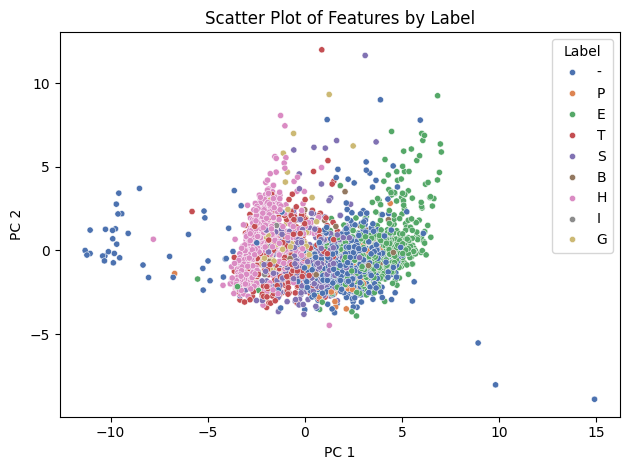

In [7]:

# Standardize features
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA → 2 components
pca     = PCA(n_components=2, random_state=42)
X_pca   = pca.fit_transform(X_scaled)

# — build a DataFrame —
df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)
df["label"] = labels

# — plot a 2-D scatter —
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="label",         # color by label
    legend="full",       # show all classes
    palette="deep",       # let seaborn choose a nice palette
    s=20
)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Scatter Plot of Features by Label")
plt.legend(title="Label")
plt.tight_layout()
plt.show()